# Task 3: Customer Segmentation

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
def customer_segmentation():
    # Aggregating transaction data
    customer_summary = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

    # Adding customer profile data
    customer_summary = customer_summary.merge(customers, on='CustomerID')

    # Standardizing data
    scaler = StandardScaler()
    features = scaler.fit_transform(customer_summary[['TotalValue', 'Quantity']])


In [6]:
from sklearn.preprocessing import StandardScaler

def customer_segmentation(transactions, customers):
    # Aggregating transaction data
    aggregated_data = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
    
    # Adding customer profile data
    customer_profile = aggregated_data.merge(customers, on='CustomerID')
    
    # Standardizing data
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity']])
    
    return standardized_features, customer_profile

# Usage example
standardized_features, customer_profile = customer_segmentation(transactions, customers)


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(standardized_features)

# DB Index
db_index = davies_bouldin_score(standardized_features, customer_profile['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.7212797181816302


C:\Users\Sakthi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


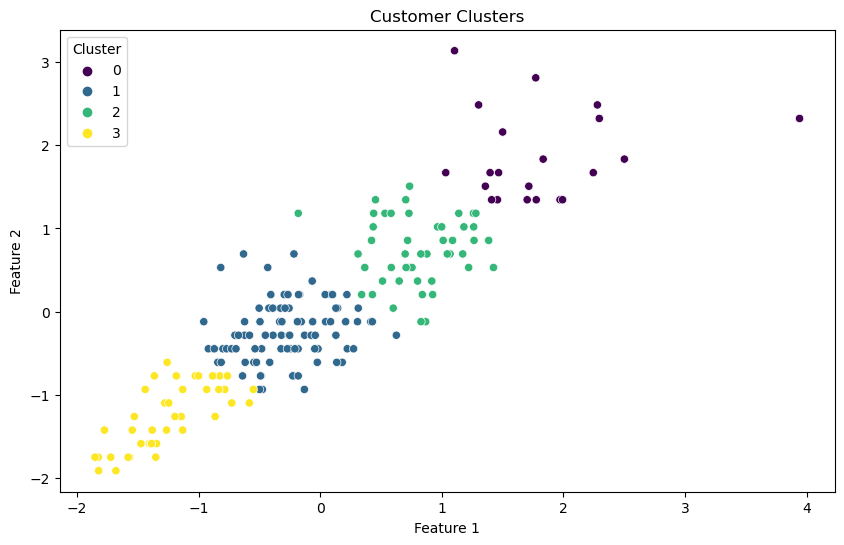

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=standardized_features[:, 0], y=standardized_features[:, 1], hue=customer_profile['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [16]:
# Save cluster report
customer_profile.to_csv('Customer_Segmentation.csv', index=False)


In [18]:
customer_segmentation(transactions, customers)

(array([[-0.06170143, -0.12203296],
        [-0.87774353, -0.44800021],
        [-0.40585722,  0.20393428],
        [ 1.03254704,  1.67078689],
        [-0.78392861, -0.93695108],
        [ 0.41587942, -0.12203296],
        [-0.48548229, -0.77396745],
        [ 0.43997044,  1.18183602],
        [-1.40630171, -1.58888557],
        [-0.9571662 , -0.12203296],
        [ 0.14369581,  0.04095066],
        [ 0.96492372,  1.0188524 ],
        [ 1.38575064,  0.85586877],
        [-1.72239508, -1.75186919],
        [-1.26353893, -1.42590195],
        [ 0.22269727, -0.44800021],
        [ 0.70375173,  1.34481964],
        [ 0.71908486,  0.85586877],
        [-0.70101045, -0.28501659],
        [-1.39212827, -1.58888557],
        [ 1.0681256 ,  0.69288515],
        [ 0.64973294,  0.3669179 ],
        [ 0.92520418,  0.20393428],
        [ 0.08736309,  0.20393428],
        [-1.02704328, -0.77396745],
        [ 0.04471149, -0.12203296],
        [-0.49471609, -0.12203296],
        [ 1.83377022,  1.833